# Task 3

Made by Roman Efremov, J41325c

# Logistic Regression as a Neural Network 
(partly following deeplearning.ai lab)

    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn
from sklearn.model_selection import train_test_split
import random

%matplotlib inline

## General Architecture of the algorithm ##


Build a Logistic Regression, using a Neural Network mindset.

**Logistic Regression is actually a very simple Neural Network!**


**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$$

**Key steps**:
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

## Parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features, number of layers, number of neurons in the layer etc.) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

Build 1-3 separately and integrate them into one function we call `model()`.

### Sigmoid

$sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ 

In [2]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))
    zz
    return s

In [3]:
print ("sigmoid([0, 2, 10, -10]) = " + str(sigmoid(np.array([0., 2., -2., 100.]))))

sigmoid([0, 2, 10, -10]) = [0.5        0.88079708 0.11920292 1.        ]


### Initializing parameters



In [4]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.
    
    return w, b

In [5]:
dim = 3
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]
 [0.]]
b = 0.0


### Forward and Backward propagation

Implement a function `propagate()` that computes the cost function and its gradient.

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas we should use: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [92]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    if len(X.shape) == 1:
        m = 1
    else:
        m = X.shape[1]
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b)                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [7]:
w, b, X, Y = np.array([[1.],[-1.]]), 4., np.array([[1.,5.,-1.],[10.,0.,-3.2]]), np.array([[0,1,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.0027004 ]
 [0.02446984]]
db = [0.00151471]
cost = [0.00295537]


### Optimization
- We have initialized the parameters.
- We are able to compute a cost function and its gradient.
- Now, we have to update the parameters using gradient descent.

For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [37]:
# optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -= learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [9]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 1000, learning_rate = 0.005, print_cost = True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Cost after iteration 0: 0.002955
Cost after iteration 100: 0.002683
Cost after iteration 200: 0.002461
Cost after iteration 300: 0.002278
Cost after iteration 400: 0.002124
Cost after iteration 500: 0.001991
Cost after iteration 600: 0.001877
Cost after iteration 700: 0.001777
Cost after iteration 800: 0.001689
Cost after iteration 900: 0.001611
w = [[ 0.99092423]
 [-1.08149946]]
b = [3.99591156]
dw = [[0.00128065]
 [0.01144573]]
db = [0.00041775]


Implement the `predict()` function. There are two steps to compute predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of A into 0 (if activation <= 0.5) or 1 (if activation > 0.5), store the predictions in a vector `Y_prediction`. 

In [89]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction

In [11]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]



Already have:
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - computing the cost and its gradient 
    - updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples

## Merge it all into a model ##

    - Y_prediction_test for the predictions on the test set
    - Y_prediction_train for the predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [150]:
# model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False,
          optimize_func=None, random_state=None):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    if optimize_func == 'sgd':
        parameters, grads, costs = optimize_sgd(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost, 
                                                 random_state=random_state)
    elif optimize_func == 'adam':
        parameters, grads, costs = optimize_adam(w, b, X_train, Y_train, num_iterations, print_cost)
    else:
        parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [29]:
df = pd.read_csv("bioresponse.csv")
print(df.shape)
df.head()

(3751, 1777)


,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [20]:
x = df.drop(['Activity'], axis=1)
y = df['Activity']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.25)

In [72]:
x_train_m = x_train.values.T
y_train_m = y_train.values.reshape(1, y_train.shape[0])
x_test_m = x_test.values.T
y_test_m = y_test.values.reshape(1, y_test.shape[0])

In [111]:
trained_model = model(x_train_m, y_train_m, x_test_m, y_test_m, 
                      num_iterations = 6000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.681095
Cost after iteration 200: 0.673994
Cost after iteration 300: 0.667662
Cost after iteration 400: 0.661794
Cost after iteration 500: 0.656314
Cost after iteration 600: 0.651172
Cost after iteration 700: 0.646329
Cost after iteration 800: 0.641754
Cost after iteration 900: 0.637419
Cost after iteration 1000: 0.633303
Cost after iteration 1100: 0.629386
Cost after iteration 1200: 0.625651
Cost after iteration 1300: 0.622084
Cost after iteration 1400: 0.618672
Cost after iteration 1500: 0.615404
Cost after iteration 1600: 0.612268
Cost after iteration 1700: 0.609257
Cost after iteration 1800: 0.606360
Cost after iteration 1900: 0.603572
Cost after iteration 2000: 0.600884
Cost after iteration 2100: 0.598291
Cost after iteration 2200: 0.595786
Cost after iteration 2300: 0.593365
Cost after iteration 2400: 0.591023
Cost after iteration 2500: 0.588755
Cost after iteration 2600: 0.586557
Cost after iteration 2700: 0.584426
Cost

Bibliography:
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/


In [108]:
# optimize with stochastic gradient descent

def optimize_sgd(w, b, X, Y, num_iterations, learning_rate, print_cost = False, random_state=None):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    if random_state:
        random.seed(random_state)
    
    costs = []
    
    for i in range(num_iterations):
        features_num, samples_num = X.shape
        chosen_sample = random.randint(0, samples_num - 1)
        X_sample = X[:,chosen_sample]
        Y_sample = Y[:,chosen_sample]
        
        X_sample = X_sample.reshape(X_sample.shape[0], 1)
        Y_sample = np.array([Y_sample])
                    
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X_sample,Y_sample)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -= learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [109]:
trained_model = model(x_train_m, y_train_m, x_test_m, y_test_m, 
                      num_iterations = 100000, learning_rate = 0.001, print_cost = True, 
                      random_state=42,
                      optimize_func='sgd')

Cost after iteration 0: 0.693147
Cost after iteration 1000: 0.579157
Cost after iteration 2000: 0.836750
Cost after iteration 3000: 0.861108
Cost after iteration 4000: 0.258924
Cost after iteration 5000: 0.410898
Cost after iteration 6000: 0.293533
Cost after iteration 7000: 0.450874
Cost after iteration 8000: 0.649509
Cost after iteration 9000: 0.366893
Cost after iteration 10000: 0.237959
Cost after iteration 11000: 0.443714
Cost after iteration 12000: 1.096991
Cost after iteration 13000: 0.222059
Cost after iteration 14000: 0.307416
Cost after iteration 15000: 0.998827
Cost after iteration 16000: 1.562511
Cost after iteration 17000: 0.738364
Cost after iteration 18000: 0.220779
Cost after iteration 19000: 1.123146
Cost after iteration 20000: 0.304444
Cost after iteration 21000: 0.220192
Cost after iteration 22000: 0.104034
Cost after iteration 23000: 0.321724
Cost after iteration 24000: 0.119360
Cost after iteration 25000: 0.126814
Cost after iteration 26000: 0.146050
Cost after ite

In [112]:
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1 ]

In [180]:
def run_and_plot(optimize_func, lr):
    print(f"\nTesting on learing rate = {lr} algorithm {optimize_func}")
    if optimize_func == 'sgd':
        d = model(x_train_m, y_train_m, x_test_m, y_test_m, 
                                  num_iterations = 40000, learning_rate = lr,
                                  random_state=42,
                                  optimize_func='sgd')
        algo_name = 'SGD'
        color = 'g'
    elif optimize_func == 'adam':
        d = model(x_train_m, y_train_m, x_test_m, y_test_m, 
                                  num_iterations = 500,
                                  optimize_func='adam')
        algo_name = 'Adam\'s'
        color = 'r'
    else:
        d = model(x_train_m, y_train_m, x_test_m, y_test_m, 
                               num_iterations = 2000, learning_rate = lr)
        algo_name = 'GD'
        color = 'b'
    
    costs = [c[0] for c in d['costs']]
    xs = range(0, 100 * len(costs), 100)
    plt.title(f"Costs for learning rate = {lr} with {algo_name}")
    plt.xlabel("Number of iterations")
    plt.ylabel("Cost")
    plt.plot(xs, costs, color=color)
    plt.show()


Testing on learing rate = 0.001 algorithm gd
train accuracy: 72.52044081052257 %
test accuracy: 72.70788912579957 %


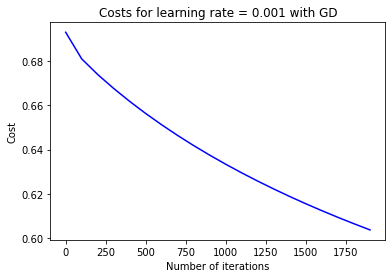


Testing on learing rate = 0.001 algorithm sgd
train accuracy: 78.88375399928901 %
test accuracy: 75.5863539445629 %


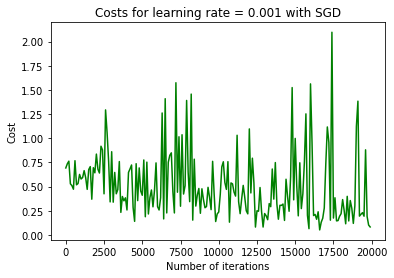


Testing on learing rate = 0.005 algorithm gd
train accuracy: 77.10629221471739 %
test accuracy: 74.73347547974413 %


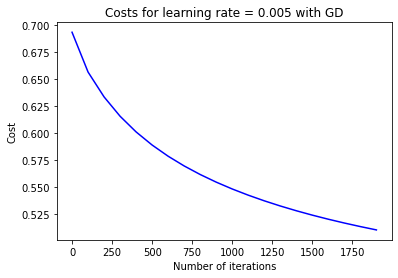


Testing on learing rate = 0.005 algorithm sgd
train accuracy: 81.90543903306079 %
test accuracy: 75.05330490405117 %


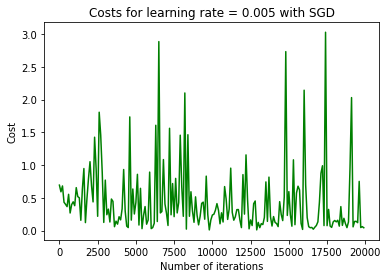


Testing on learing rate = 0.01 algorithm gd
train accuracy: 78.35051546391753 %
test accuracy: 75.5863539445629 %


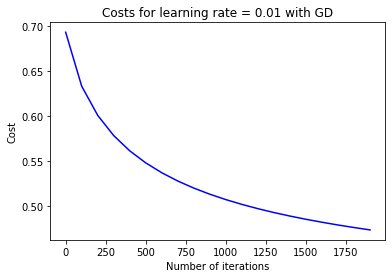


Testing on learing rate = 0.01 algorithm sgd
train accuracy: 82.29648062566655 %
test accuracy: 75.05330490405117 %


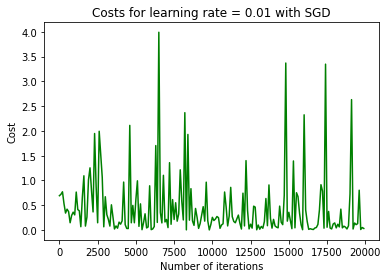


Testing on learing rate = 0.05 algorithm gd
train accuracy: 82.26093138997511 %
test accuracy: 76.97228144989339 %


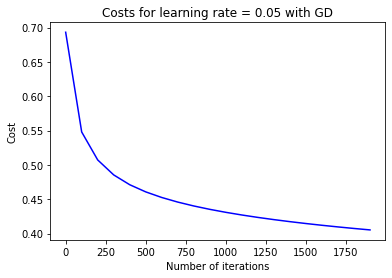


Testing on learing rate = 0.05 algorithm sgd
train accuracy: 80.59011731247779 %
test accuracy: 73.34754797441364 %


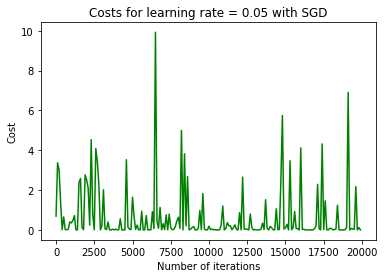


Testing on learing rate = 0.1 algorithm gd
train accuracy: 83.32740846071809 %
test accuracy: 76.43923240938166 %


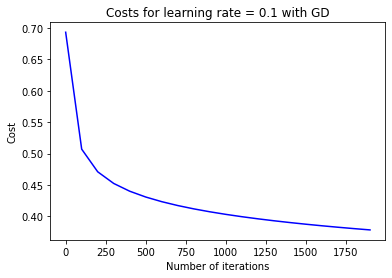


Testing on learing rate = 0.1 algorithm sgd


<ipython-input-92-1235576a32cb>:27: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
<ipython-input-92-1235576a32cb>:27: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost


train accuracy: 79.55918947742623 %
test accuracy: 72.38805970149254 %


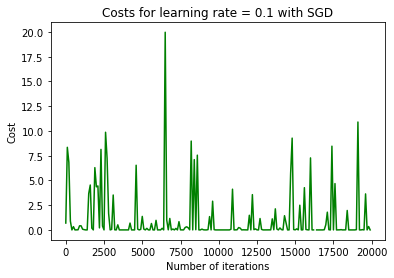

In [144]:
for lr in learning_rates:
    run_and_plot('gd', lr)
    run_and_plot('sgd', lr)

From plotted graphs it can be concluded that implemented simple GD works well on each tested learning rate and decreases cost smoothly. Meanwhile, SGD has many big costs (much bigger than initial) which happen suddenly. But on low learning rates SGD works better. Also we can see that bigger learning rates give worse accuracy.

In [172]:
# optimize with Adam's algorithm

def optimize_adam(w, b, X, Y, num_iterations, b1=0.9,b2=0.999, a=0.001, print_cost = False):
    e = 1e-8
    costs = []
    m_prev = np.zeros(w.shape[0] + 1)
    v_prev = np.zeros(w.shape[0] + 1)
    
    for i in range(num_iterations):                    
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        dw_adopted = np.array(dw)[:, 0]
        gr = np.concatenate((db, dw_adopted))
        m = m_prev * b1 + gr * (1 - b1)
        v = v_prev * b2 + (gr ** 2) * (1 - b2)
        step = i + 1
        m_corr = m / (1 - b1 ** step)
        v_corr = v / (1 - b2 ** step)
        diff = m_corr * a / (np.sqrt(v_corr) + e)
        
        m_prev = m
        v_prev = v
        
        w_diff = diff[1:]
        b_diff = diff[0]
        
        # update rule
        w -= np.reshape(w_diff, (len(w_diff), 1))
        b -= np.reshape(b_diff, (1, 1))
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs


Testing on learing rate = 0.0001 algorithm adam
train accuracy: 84.35833629576965 %
test accuracy: 76.54584221748401 %


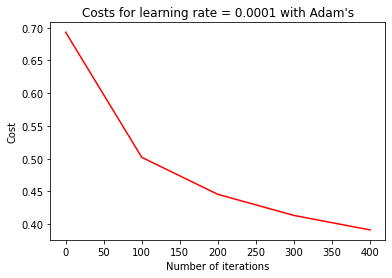

In [179]:
run_and_plot('adam', 0.0001)


Testing on learing rate = 0.001 algorithm sgd
train accuracy: 80.09242801279773 %
test accuracy: 76.33262260127933 %


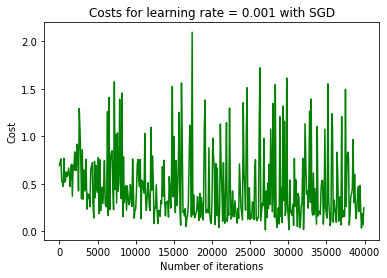

In [181]:
run_and_plot('sgd', 0.001)

We can conclude that Adam's algorithms show better accuracy. But actually accuracy depends on number of iterations and in case of SGD on inital random seed. SGD works faster, so at the equal time we can perform more iterations with SGD, and probably get better accuracy.